# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

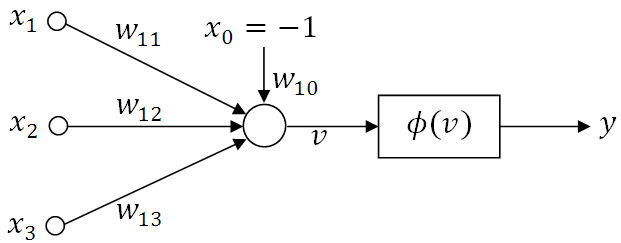

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [94]:
import numpy as np

def step_function(x):
    if x < 0:
        return 0
    return 1

def ramp_function(x):
    if x <= -0.5:
        return 0
    elif x >= 0.5:
        return 1
    return x + 0.5

def sigmoid_function(x, a=1):
    return 1/(1 + np.exp(-a*x))

def neuron(x, w, activation):
    sum = np.dot(x, w)
    if activation == "step":
        return step_function(sum)
    elif activation == "ramp":
        return ramp_function(sum)
    return sigmoid_function(sum)

**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [95]:
w = [0.1,1,-0.99,0.2]

x1 =np.array([-1,0.5,1,0.7]).T
x2 = np.array([-1,0,0.8,0.2]).T
print(neuron(x1,w,"step"))
print(neuron(x1,w,"ramp"))
print(neuron(x1,w,"sigmoid"))
print(neuron(x2,w,"step"))
print(neuron(x2,w,"ramp"))
print(neuron(x2,w,"sigmoid"))

0
0.04999999999999993
0.389360766050778
0
0
0.2990134802497037


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

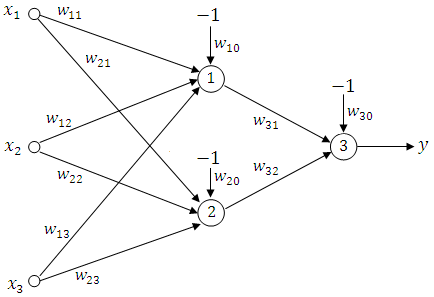

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [96]:
def three_neuron_network(x):
    𝑤1=np.array([1,0.5,1,-0.4])
    𝑤2=np.array([0.5,0.6,-1.5,-0.7])
    𝑤3=np.array([-0.5,-1.5,0.6])
    sec_layer = np.array([-1])
    sec_layer = np.append(sec_layer,neuron(x,w1,"sigmoid"))
    sec_layer = np.append(sec_layer,neuron(x,w2,"sigmoid")).T
    
    return neuron(sec_layer,w3,"sigmoid")
    
    

**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

In [97]:
print(three_neuron_network(np.array([-1,0.3,0.7,0.9]).T))

0.5021828523608841


In [98]:
#The output does depend on the neuron weights

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

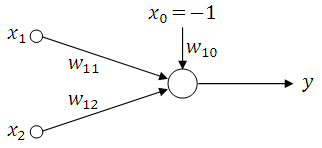

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


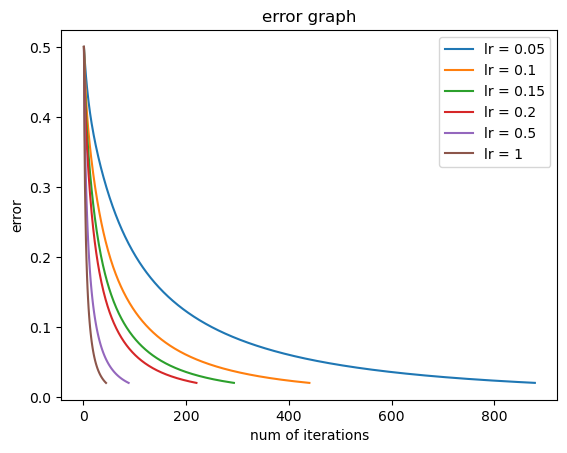

In [99]:
import matplotlib.pyplot as plt

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]
d = np.array([0,0,0,1])
X = np.array([x1,x2,x3,x4])

lr = [0.05, 0.1, 0.15, 0.2, 0.5,1]

for j in range(len(lr)):
    w = np.array([0,0,0])
    mean_squared_error = 1
    graph = []
    while(mean_squared_error > 0.02):
        mean_squared_error = 0
        arr = X
        y = neuron(arr,w.T,"sigmoid")
        mean_squared_error += np.sum(np.square(d-y))/2
        delta = lr[j] * ((d - y) @ arr)
        w = np.add(w, delta)
        graph.append(mean_squared_error)
    plt.plot([i for i in range(1,len(graph)+1)], graph, label =f'lr = {lr[j]}')

plt.xlabel('num of iterations')
plt.ylabel('error')
plt.title('error graph')
plt.legend()

plt.show()



In [100]:
#the best learning rate in this case is 0.05. Other learning rates are faster but not necessary 
#better because they are unstable, and we can see that in the steep descent on the graph.

#we need to decide between speed and the lower rate of learing. In this case i 
#used 0.01 which is fast enough and is an exceptable error for this binary classification problem

#It terminates when it reaches error smaller that the one predefined. this is different for different learning rates
#We can see that where the error functions end on the graph

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [101]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [102]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [103]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [104]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [105]:
print(a1.T, char(M@a1))
print(a2.T, char(M@a2))
print(a3.T, char(M@a3))
print(a4.T, char(M@a4))

[[1 0 0 0]] vrat
[[0 1 0 0]] kraj
[[0 0 1 0]] cres
[[0 0 0 1]] otac


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


In [106]:
# 1. All pairs were memorised correctly
# 2. It will correctly memorise the same number fo words as there is normalised vectors

### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [107]:
a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [108]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T
print(M_five)

[[195.07463915 107.         176.07463915 111.        ]
 [194.61017306 114.         194.61017306 116.        ]
 [165.58935778  97.         169.58935778  97.        ]
 [191.66042559 106.         190.66042559  99.        ]]


**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [109]:
#not all assocsiations were correctly memorised

#the associations that are linearly independent are correctly memorised 
#while the lineary dependet ones interfere with eachother

In [110]:
print(a1.T, char(M_five@a1))
print(a2.T, char(M_five@a2))
print(a3.T, char(M_five@a3))
print(a4.T, char(M_five@a4))
print(a5.T, char(M_five@a5))

[[1 0 0 0]] ÃÂ¥¿
[[0 1 0 0]] kraj
[[0 0 1 0]] °Â©¾
[[0 0 0 1]] otac
[[0.70710678 0.         0.70710678 0.        ]] ĆēíĎ


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [111]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [112]:
# All the responses for the input keys fall outside the space of defined chars and go above it
# None of them
# all of them, because the vectors were not normalised
# We can normalise the vectors we use

In [113]:
print(char(M@a1))
print(char(M@a2))
print(char(M@a3))
print(char(M@a4))


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


ValueError: chr() arg not in range(0x110000)

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [114]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [115]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [116]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [117]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [118]:
#the effect is that all associations are now correct
#all of them
# That we will imporve the stability because we dont alow some vectors to dominate our memory with high values 
# That the association will be more seperated one from another as the vectors are also far apart (linearly independent)
# there may be some noise for some values which may result in false output for a certain input 

In [119]:
print(char(M@c1))
print(char(M@c2))
print(char(M@c3))
print(char(M@c4))

uq`s
jq`i
bqdr
ns`b


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [120]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [121]:
#yes they were

In [122]:
print(char(np.round(M@a1)))
print(char(np.round(M@a2)))
print(char(np.round(M@a3)))
print(char(np.round(M@a4)))

vrat
kraj
cres
otac


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [123]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [124]:
#no they were not
#for the values that were memorised correctly the error is 0 and for the ones that were not the error is 33.965

In [125]:
def calculate_norm(B, M, A):
    MA = np.dot(M, A)
    B_MA = B - MA
    norm = np.linalg.norm(B_MA)
    
    return norm


print(char(np.round(M@a1)))
print(calculate_norm(b1,M,a1))
print(char(np.round(M@a2)))
print(calculate_norm(b2,M,a2))
print(char(np.round(M@a3)))
print(calculate_norm(b3,M,a3))
print(char(np.round(M@a4)))
print(calculate_norm(b4,M,a4))

print(f'total {calculate_norm(B,M,A)}')

faR`
33.9648078823402
kraj
0.0
SaV_
33.964807882340224
otac
0.0
total 67.92961576468043


/var/folders/_h/5ccbg3g943z3cx0hz61n13dr0000gn/T/ipykernel_10511/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [126]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])


In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [127]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [128]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [129]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [130]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [131]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

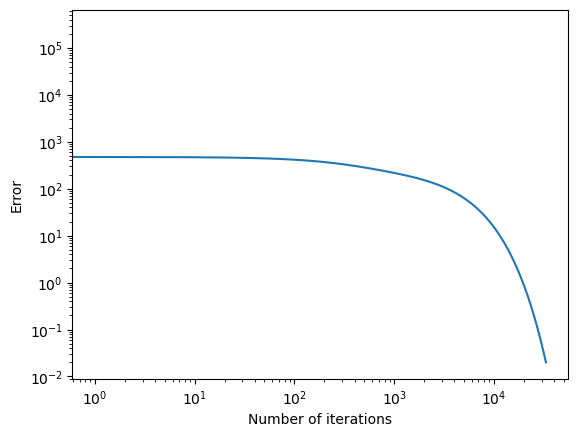

In [132]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

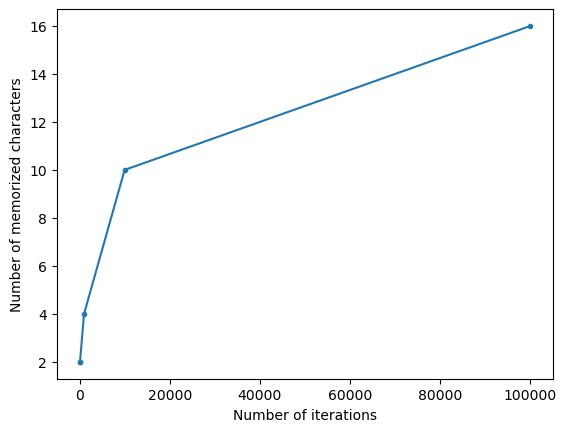

In [133]:
num_memorized = []
M_start=np.random.rand(4, 4)-0.5

for i in range(5):
    M, e=trainlms(A, B, M_start.copy(), ni, 10**(i+1))
    num_correct = np.sum(np.round(M @ A) == B)
    num_memorized.append((num_correct,10**(i+1)))

plt.plot([x[1] for x in num_memorized], [x[0] for x in num_memorized],marker = ".")
plt.xlabel("Number of iterations")
plt.ylabel("Number of memorized characters")
plt.show()


## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [134]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")
a5=real("auto")
b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")
b5=real("mrak")

A=np.hstack([a1, a2, a3, a4,a5])
B=np.hstack([b1, b2, b3, b4,b5])

M=np.random.rand(4,4)-0.5


Use the *trainlms* function in the following way:

In [135]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))
print(f'error : {e[-1]}')

2
error : 219.79844711685436


**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)

In [136]:
#10000
#2
#219.79844711685445
# Nothing different

# 2 and the mistake is the same, There is no difference because we take a big number of iterations and a normal distribution of values
#so it converges in to the same number

#No it is not
# because we can only correctly remember as many pairs as the linearly independent vectors in our matrix